In [41]:
import sys
sys.path.append("..")

In [42]:
from db.duckdb.duckdbhelper import DuckDBDatabaseHelper
from pprint import pprint
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
db = DuckDBDatabaseHelper("../meters.db")
db.connect()

Connected to DuckDB database: ../meters.db


In [44]:
sql_query =f"SELECT COUNT(1) FROM  meters"

In [45]:
records = db.fetch_all(sql_query)
print(records[0][0]/1e6)

Fetched 1 rows.
3.510433


In [46]:
sql_query =f"SELECT COUNT(DISTINCT(LCLid)) FROM  meters"
records = db.fetch_all(sql_query)
print(f"Unique LCID is {records[0][0]} ")

Fetched 1 rows.
Unique LCID is 5566 


In [47]:
sql_query =f"SELECT SUM(energy_sum) FROM  meters"
records = db.fetch_all(sql_query)
print(f"Unique LCID is {records[0][0]/1e6} ")

Fetched 1 rows.
Unique LCID is 35.539823306385365 


In [48]:
sql_query =f"""
SELECT SUM(energy_sum),datepart('year',day)
FROM  meters GROUP BY datepart('year',day)"""
records = db.fetch_all(sql_query)
print(records)

Fetched 4 rows.
[(3331542.9839594, 2014), (12488667.30284389, 2012), (19615738.613586128, 2013), (103874.40599580004, 2011)]


In [49]:
sql_query ="SELECT column_name FROM information_schema.columns WHERE table_name='meters'"
records = db.fetch_all(sql_query)
pprint(records)

Fetched 9 rows.
[('LCLid',),
 ('day',),
 ('energy_median',),
 ('energy_mean',),
 ('energy_max',),
 ('energy_count',),
 ('energy_std',),
 ('energy_sum',),
 ('energy_min',)]


In [50]:
sql_query =f"""
SELECT AVG(energy_median),datepart('year',day)
FROM  meters GROUP BY datepart('year',day)"""
records = db.fetch_all(sql_query)
pprint(records)

Fetched 4 rows.
[(0.15454604184999005, 2012),
 (0.17797958059822455, 2014),
 (0.20265235244045537, 2011),
 (0.15832142087769127, 2013)]


In [51]:
sql_query =f"""
SELECT AVG(energy_median)
FROM  meters WHERE day = '2012-12-26' """
records = db.fetch_all(sql_query)
print(records)

Fetched 1 rows.
[(0.19570832572102304,)]


In [52]:
db.close_connection()

Connection closed.


In [53]:
db.connect()
sql_query ="SELECT column_name FROM information_schema.columns WHERE table_name='info_household'"
records = db.fetch_all(sql_query)
pprint(records)

Connected to DuckDB database: ../meters.db
Fetched 5 rows.
[('LCLid',), ('stdorToU',), ('Acorn',), ('Acorn_grouped',), ('file',)]


In [54]:
sql_query ="""

SELECT SUM(m.energy_sum),ih.Acorn_grouped
FROM  meters m LEFT JOIN info_household ih
ON 
m.LCLid = ih.LCLid
GROUP BY ih.Acorn_grouped

"""

db.connect()
records = db.fetch_all(sql_query)
print(records[:4])
db.close_connection()

Connected to DuckDB database: ../meters.db
Fetched 5 rows.
[(9374.946997, 'ACORN-'), (16158190.942654783, 'Affluent'), (9374789.473811116, 'Comfortable'), (343314.32801080047, 'ACORN-U')]
Connection closed.


In [55]:
df_p = pd.DataFrame(records, columns =["energy_sum","Acorn_grouped"])
df_p = df_p.sort_values(by="energy_sum",ascending=False)

In [56]:
def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)


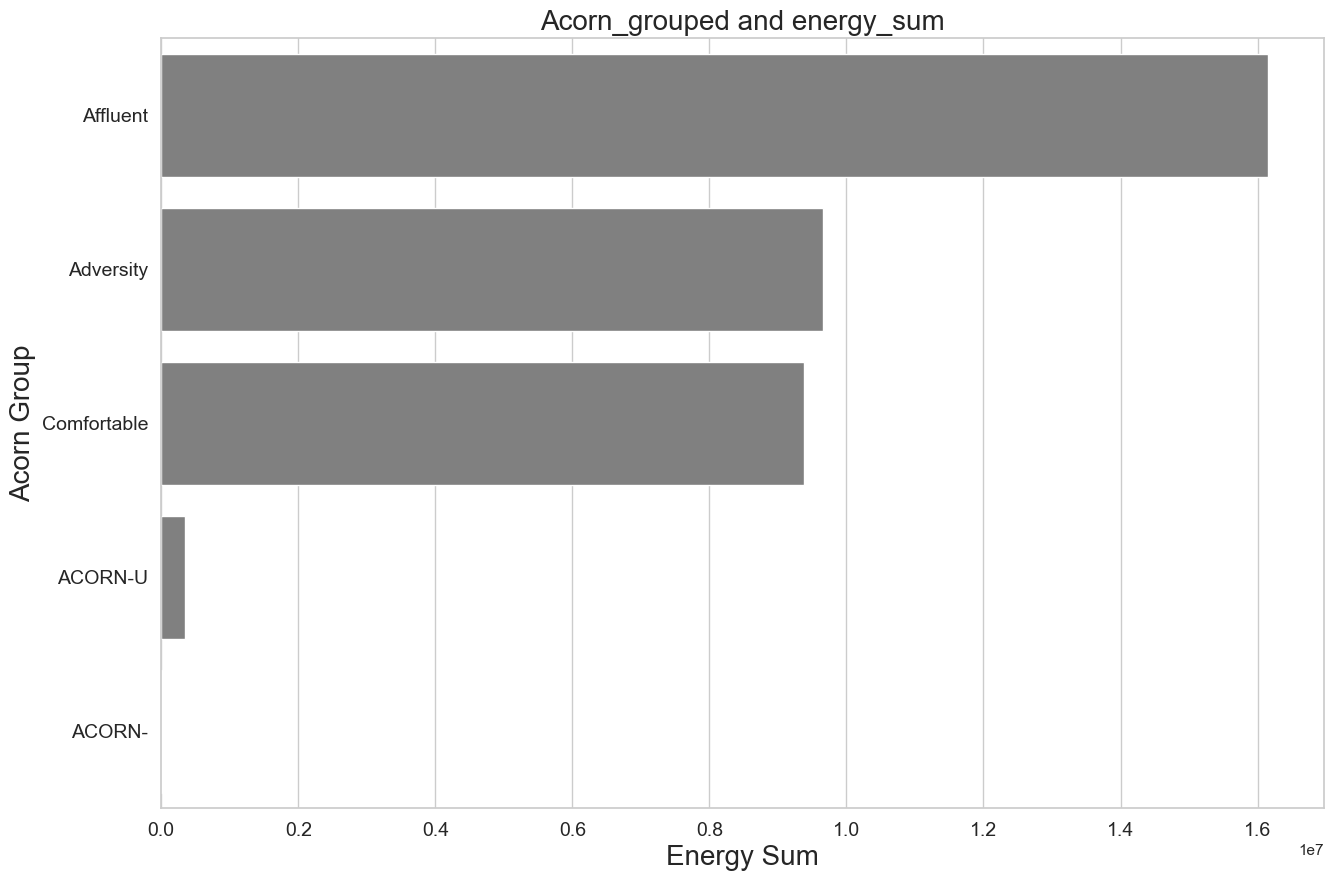

In [57]:
sns.barplot( y = 'Acorn_grouped', x = 'energy_sum', 
            data = df_p, color="gray")

title_name = "Acorn_grouped and energy_sum"
xlabel_name = "Energy Sum"
ylabel_name = "Acorn Group"

draw_plot()

In [58]:
sql_query ="""

SELECT COUNT(ih.Acorn_grouped),ih.Acorn_grouped
FROM  info_household ih
GROUP BY ih.Acorn_grouped

"""

db.connect()
records = db.fetch_all(sql_query)
print(records[:4])
db.close_connection()

Connected to DuckDB database: ../meters.db
Fetched 5 rows.
[(1507, 'Comfortable'), (2192, 'Affluent'), (2, 'ACORN-'), (1816, 'Adversity')]
Connection closed.


In [59]:
df_p = pd.DataFrame(records, columns =["Count","Acorn_grouped"])
df_p = df_p.sort_values(by="Count",ascending=False)

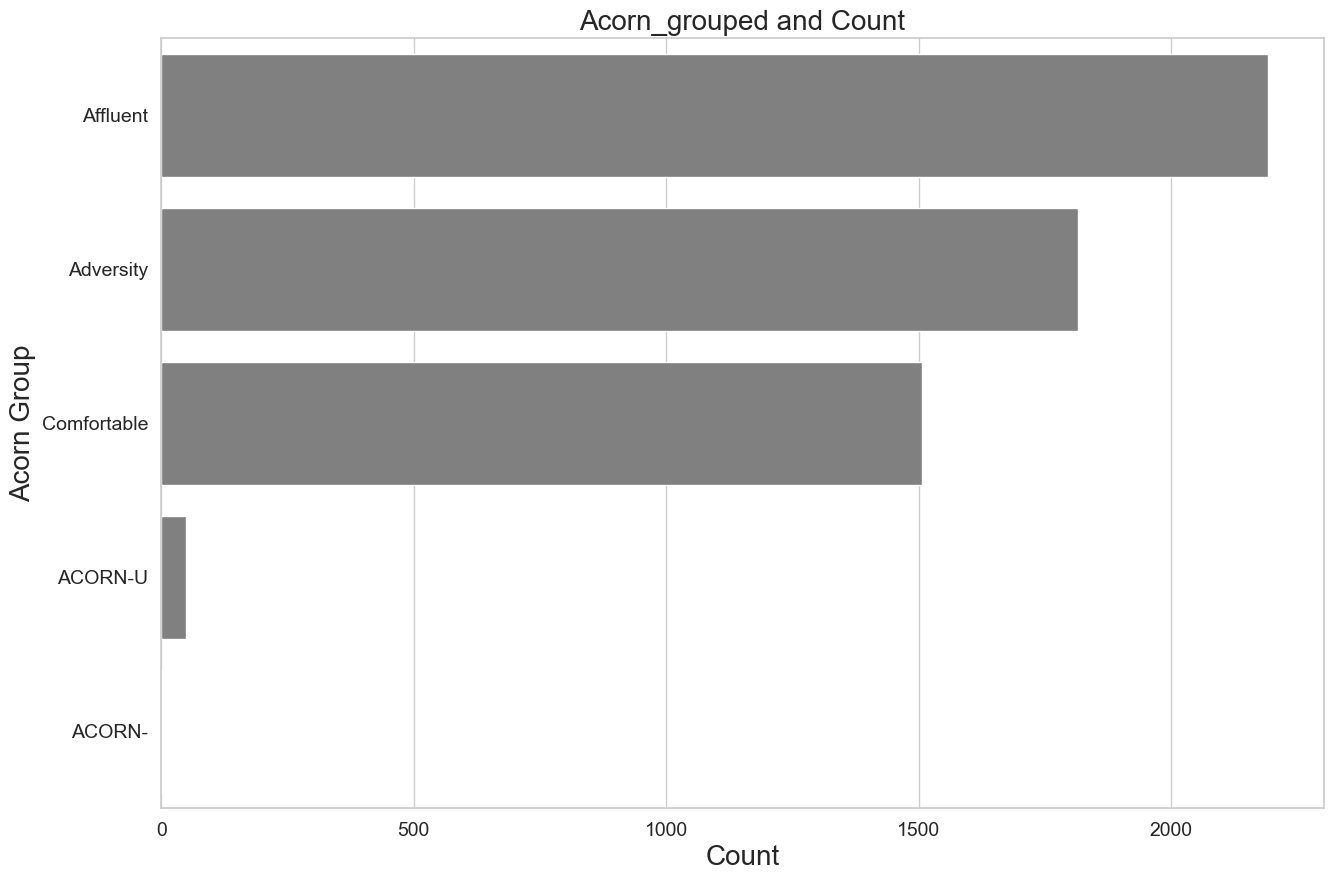

In [60]:
sns.barplot( y = 'Acorn_grouped', x = 'Count', 
            data = df_p, color="gray")

title_name = "Acorn_grouped and Count"
xlabel_name = "Count"
ylabel_name = "Acorn Group"

draw_plot()

In [61]:
sql_query ="""

SELECT SUM(m.energy_sum),ih.file
FROM  meters m LEFT JOIN info_household ih
ON 
m.LCLid = ih.LCLid
GROUP BY ih.file

"""

db.connect()
records = db.fetch_all(sql_query)
print(records[:4])
db.close_connection()

Connected to DuckDB database: ../meters.db
Fetched 112 rows.
[(318598.2699939011, 'block_110'), (250215.55200269847, 'block_103'), (278627.1759870996, 'block_43'), (299146.6910000013, 'block_64')]
Connection closed.


In [62]:
df_p = pd.DataFrame(records, columns =["energy_sum","file"])
df_p = df_p.sort_values(by="energy_sum",ascending=False)

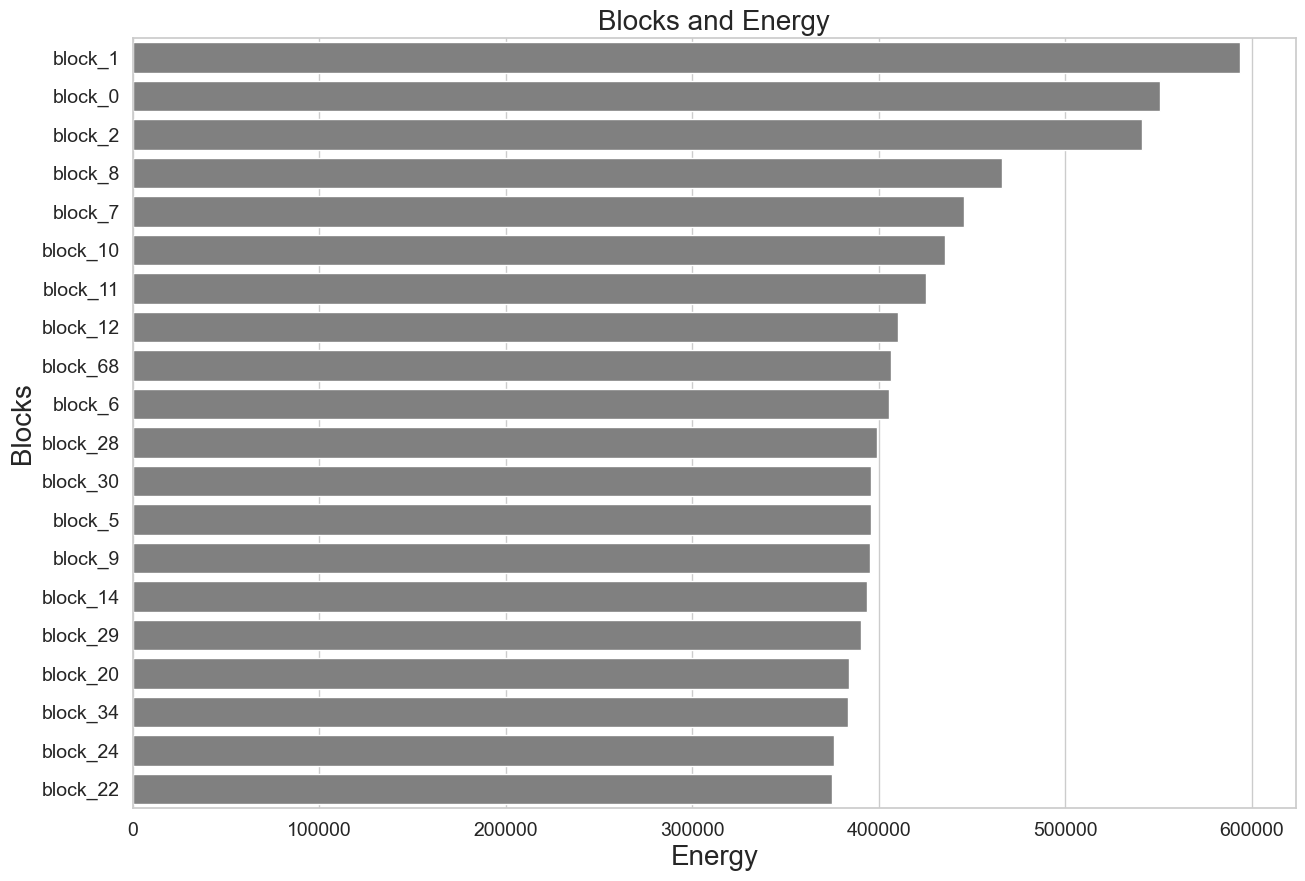

In [63]:
sns.barplot( y = 'file', x = 'energy_sum', 
            data = df_p[:20], color="gray")

title_name = "Blocks and Energy"
xlabel_name = "Energy"
ylabel_name = "Blocks"

draw_plot()

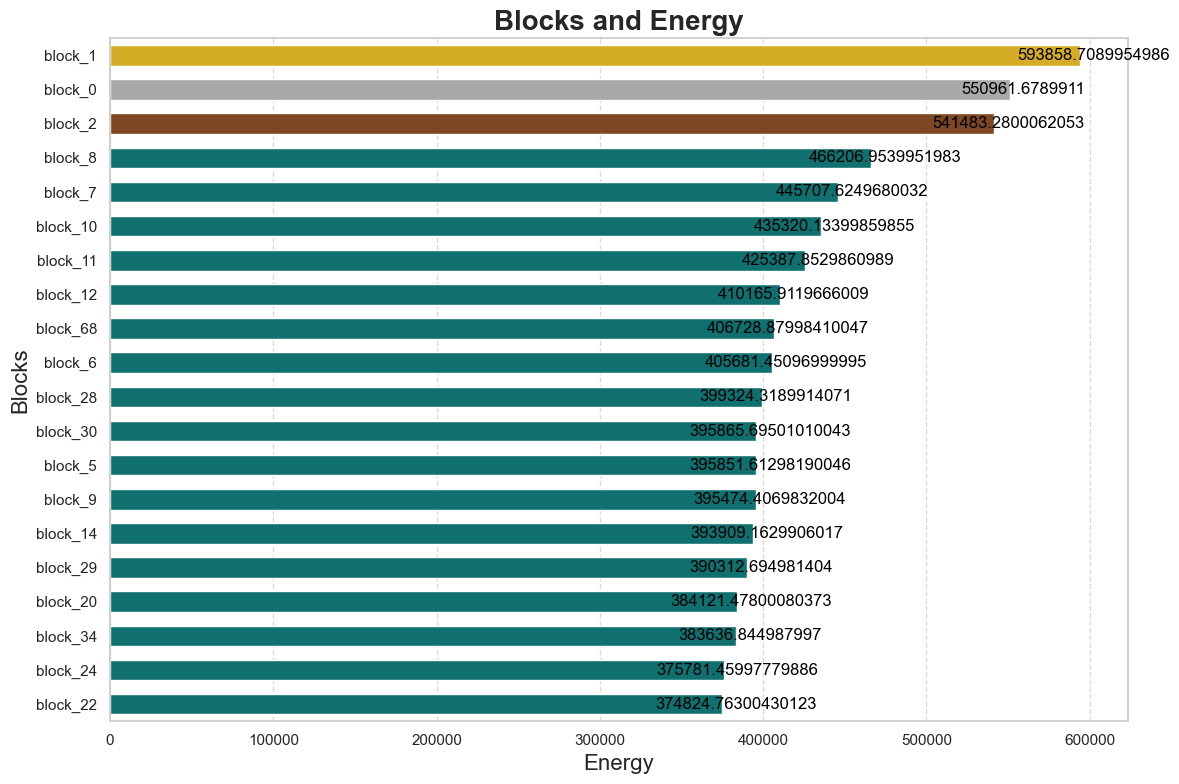

In [64]:
# Create a list of colors for the bars

colors = ['#F3BC07', '#A9A9A9', '#8B4513'] + ['#008080'] * (len(df_p[:20]) - 3)

# Set the style
sns.set_theme(style="whitegrid")

# Create the figure with a specified size
plt.figure(figsize=(12, 8))

# Create the barplot
bar_plot = sns.barplot(y='file', 
                       x='energy_sum', 
                       data=df_p[:20], 
                       hue='file', 
                       palette=colors, 
                       dodge=False, 
                       width=0.6)

# Set titles and labels with enhanced font sizes and styles
plt.title("Blocks and Energy", fontsize=20, fontweight='bold')
plt.xlabel("Energy", fontsize=16)
plt.ylabel("Blocks", fontsize=16)

# Add data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width()}', 
                      (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='center', va='center', 
                      fontsize=12, color='black', 
                      xytext=(10, 0), textcoords='offset points')



# Show gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [65]:
sql_query ="""

SELECT COUNT(DISTINCT(ih.file))
FROM info_household ih

"""

db.connect()
records = db.fetch_all(sql_query)
print(records[:4])
db.close_connection()

Connected to DuckDB database: ../meters.db
Fetched 1 rows.
[(112,)]
Connection closed.


In [66]:
sql_query ="""

SELECT COUNT(1),ih.file
FROM info_household ih
GROUP BY (ih.file)

"""

db.connect()
records = db.fetch_all(sql_query)
pprint(records)
db.close_connection()

Connected to DuckDB database: ../meters.db
Fetched 112 rows.
[(50, 'block_4'),
 (50, 'block_13'),
 (50, 'block_14'),
 (50, 'block_21'),
 (50, 'block_28'),
 (50, 'block_39'),
 (50, 'block_42'),
 (50, 'block_49'),
 (50, 'block_60'),
 (50, 'block_71'),
 (50, 'block_72'),
 (50, 'block_73'),
 (50, 'block_94'),
 (50, 'block_100'),
 (16, 'block_111'),
 (50, 'block_5'),
 (50, 'block_10'),
 (50, 'block_26'),
 (50, 'block_35'),
 (50, 'block_44'),
 (50, 'block_46'),
 (50, 'block_47'),
 (50, 'block_53'),
 (50, 'block_56'),
 (50, 'block_61'),
 (50, 'block_62'),
 (50, 'block_87'),
 (50, 'block_93'),
 (50, 'block_98'),
 (50, 'block_99'),
 (50, 'block_102'),
 (50, 'block_7'),
 (50, 'block_11'),
 (50, 'block_19'),
 (50, 'block_22'),
 (50, 'block_85'),
 (50, 'block_95'),
 (50, 'block_104'),
 (50, 'block_18'),
 (50, 'block_30'),
 (50, 'block_32'),
 (50, 'block_36'),
 (50, 'block_52'),
 (50, 'block_78'),
 (50, 'block_80'),
 (50, 'block_81'),
 (50, 'block_83'),
 (50, 'block_86'),
 (50, 'block_88'),
 (50, '

In [67]:
sql_query ="""

SELECT *
FROM  meters m LEFT JOIN info_household ih
ON 
m.LCLid = ih.LCLid

"""

db.connect()
records = db.fetch_all(sql_query)
db.close_connection()

Connected to DuckDB database: ../meters.db
Fetched 3510433 rows.
Connection closed.


In [68]:
sql_query ="""

SELECT energy_sum
FROM  meters m 
WHERE 
date_part('year', day) = 2013
AND date_part('month', day) = 9
AND date_part('day', day) = 10
"""

db.connect()
records = db.fetch_all(sql_query)
db.close_connection()

Connected to DuckDB database: ../meters.db
Fetched 5243 rows.
Connection closed.


In [69]:
energy_sum = pd.DataFrame(records,columns= ["energy_sum"]).fillna(0)

In [70]:
from sklearn.cluster import KMeans

In [71]:
n_energy_sum = np.array(energy_sum["energy_sum"])

In [72]:
n_energy_sum

array([ 4.548    , 18.7899999, 15.123    , ...,  1.85     ,  3.028    ,
        9.023    ])

In [73]:
kmeans = KMeans(n_clusters=10, 
                random_state=0,
                  n_init="auto").fit(n_energy_sum.reshape(-1, 1))
labels = list(kmeans.labels_)

In [74]:
clusters = pd.DataFrame()

In [75]:
clusters["energy_sum"] = energy_sum

In [76]:
clusters["labels"] = labels

In [77]:
clusters

,energy_sum,labels
0,4.548,3
1,18.790,4
2,15.123,4
3,7.427,9
4,19.618,8
...,...,...
5238,18.320,4
5239,7.370,9
5240,1.850,0
5241,3.028,0


In [78]:
result = clusters.groupby('labels')['energy_sum'].agg(['mean', 'count'])

In [79]:
result

,mean,count
labels,,
0,2.591642,1237
1,11.876541,772
2,29.796274,95
3,5.461065,1386
4,16.126023,429
5,59.012533,15
6,102.382000,2
7,39.647435,46
8,21.525187,187
